In [1]:
%matplotlib inline

import numpy as np
import skimage.transform
import torch
import torch.nn as nn
import torch.nn. functional as F

from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms

from cam import CAM, GradCAM, GradCAMpp
from visualize import visualize, reverse_normalize

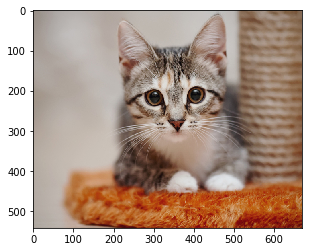

In [2]:
image = Image.open('./img/cat.jpg')
imshow(image)

In [3]:
# preprocessing. mean and std from ImageNet
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

In [5]:
# convert image to tensor
tensor = preprocess(image)

In [6]:
# reshape 4D tensor (N, C, H, W)
tensor = tensor.unsqueeze(0)

In [7]:
tensor.shape

torch.Size([1, 3, 224, 224])

In [8]:
model = models.resnet18(pretrained=True)
model.eval()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [9]:
# the layer you want to visualize
target_layer = model.layer4[1].conv2

# wrapper for class activation mapping. Choose one of the following.
wrapped_model = CAM(model, target_layer)
# model =GradCAM(model, target_layer)
# model = GradCAMpp(model, target_layer)

In [10]:
cam = wrapped_model(tensor)

predicted object ids 281	 probability 0.4166613221168518


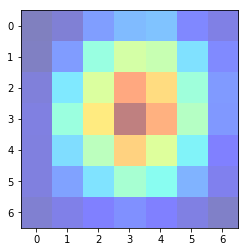

In [46]:
# visualize only cam
imshow(cam.squeeze().numpy(), alpha=0.5, cmap='jet')

In [ ]:
# reverse normalization for display
img = reverse_normalize(tenso

In [15]:
heatmap = visualize(img, cam)

In [35]:
# save image
from torchvision.utils import save_image
save_image(heatmap, './img/cam.png')

In [66]:
# or visualize on Jupyter
hm = (heatmap.squeeze().numpy().transpose(1, 2, 0) * 255).astype(np.int32)

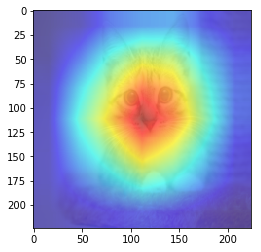

In [67]:
imshow(hm)